# Taitanic Data Classification

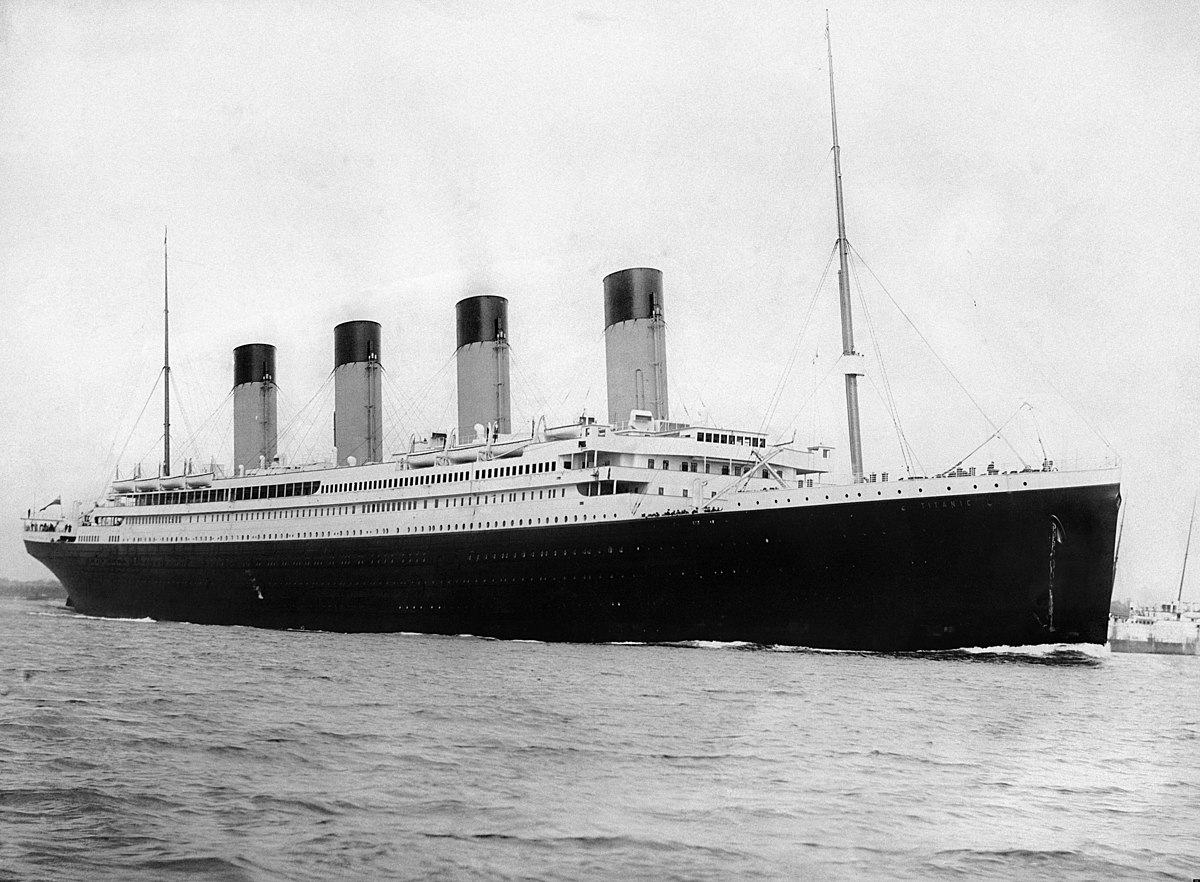

In [1]:
from IPython import display
display.Image('/content/RMS_Titanic_3.jpg')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statistics
import statsmodels
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('/content/datasets_11657_16098_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Count of Unique values

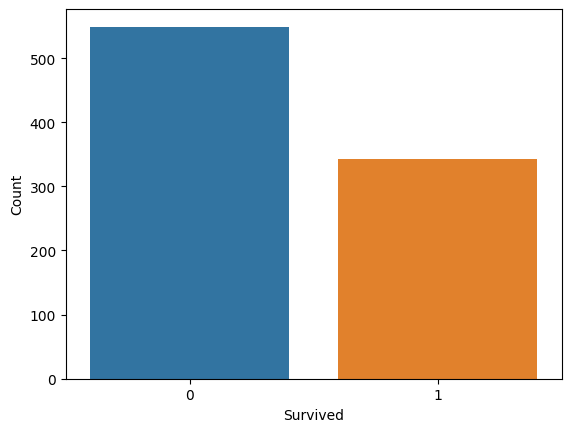

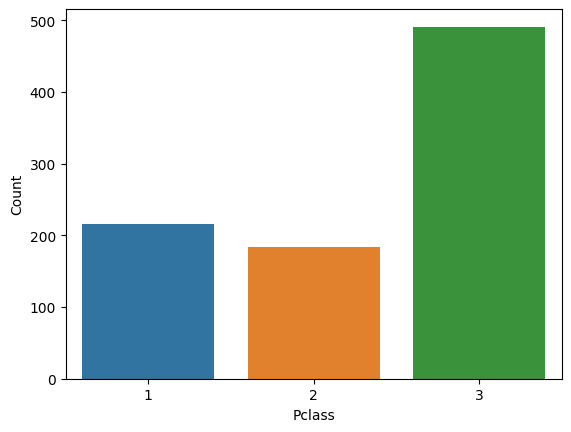

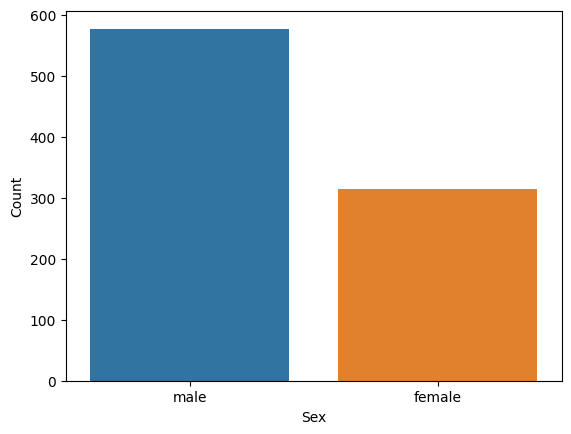

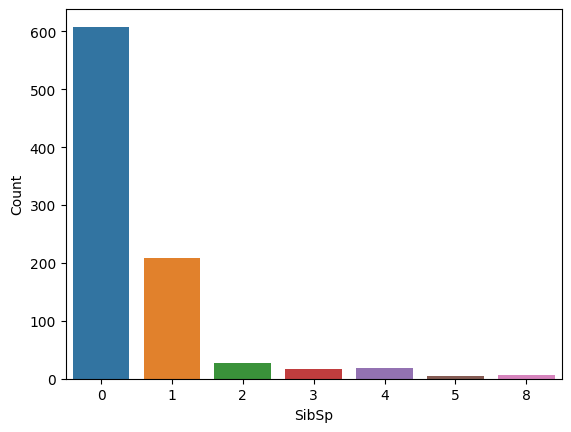

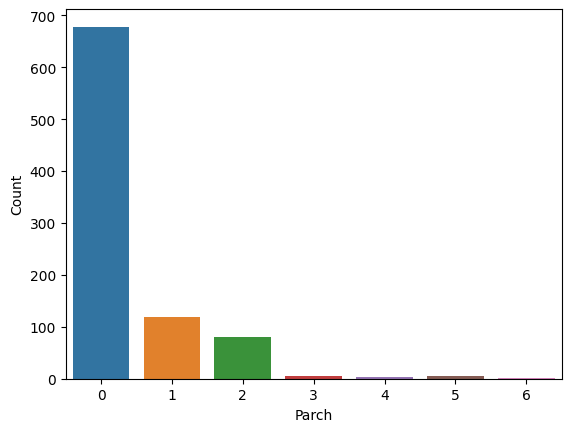

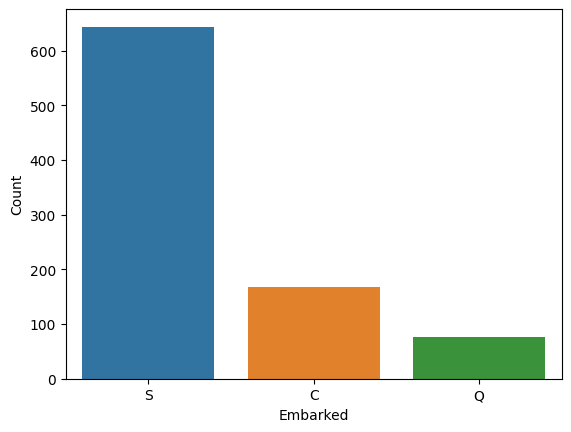

In [11]:
for c in df.columns:
  if df[c].nunique() <11:
    #plt.subplot(2,3,id)
    sns.countplot(data=df,x=c)
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

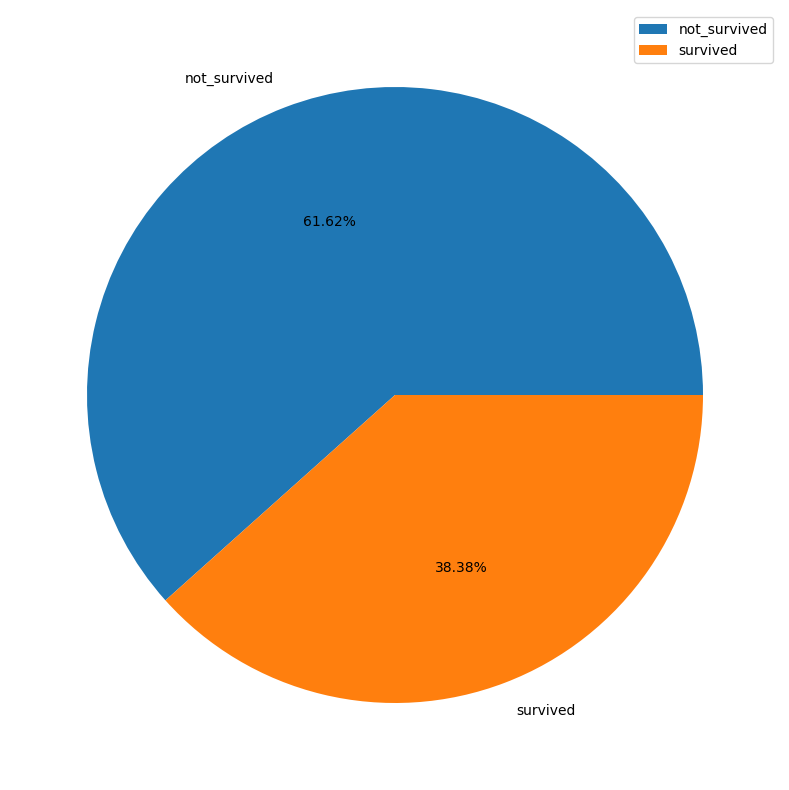

In [12]:
plt.figure(figsize=(15,10))
plt.pie(df['Survived'].value_counts(),labels=['not_survived','survived'],autopct='%.2f%%')
plt.legend()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in df.columns:
  if df[i].dtype =='object':
    df[i]=lab.fit_transform(df[i])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


## Distribution

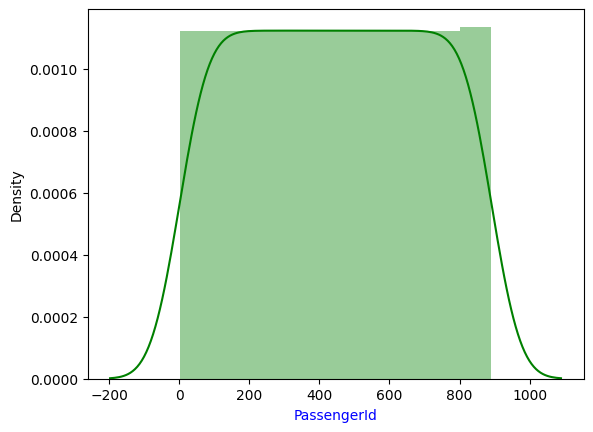

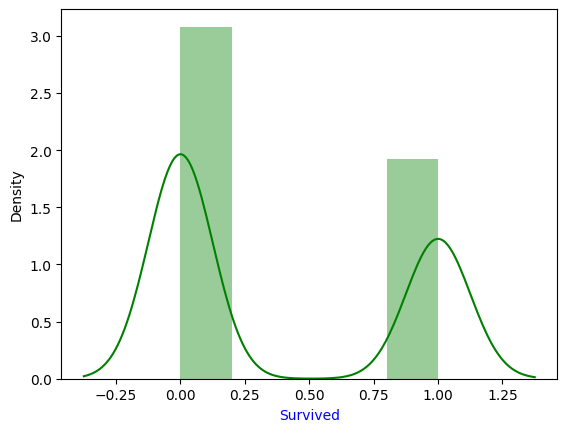

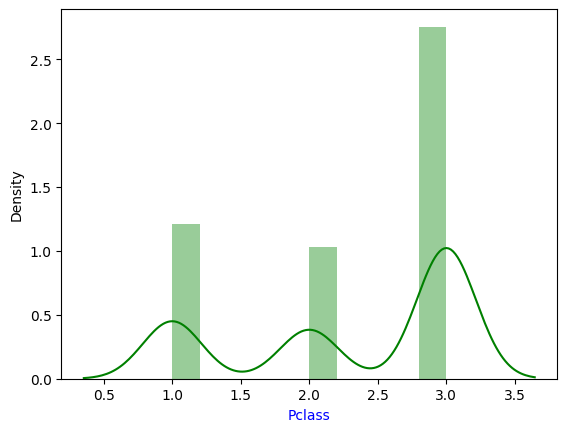

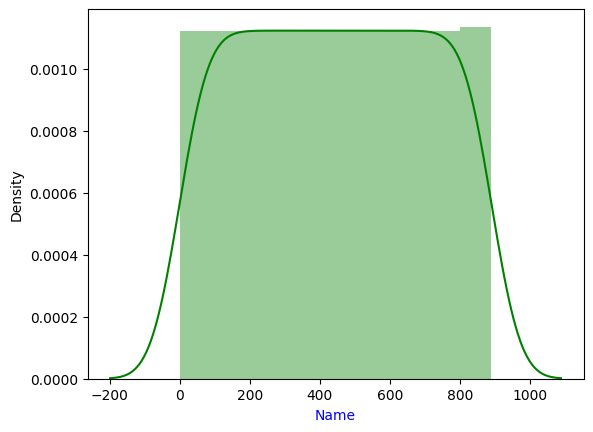

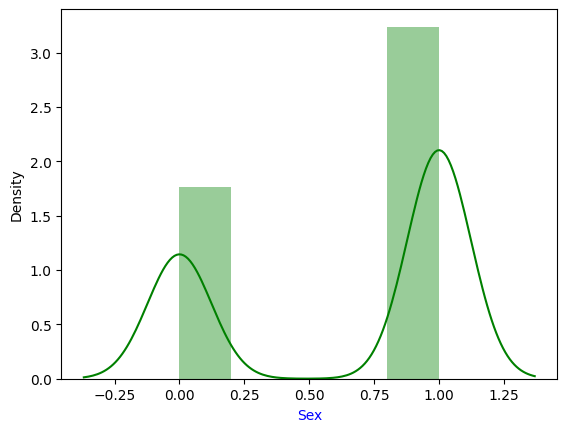

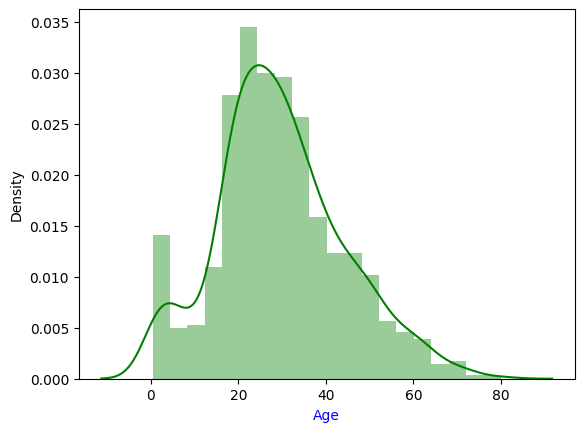

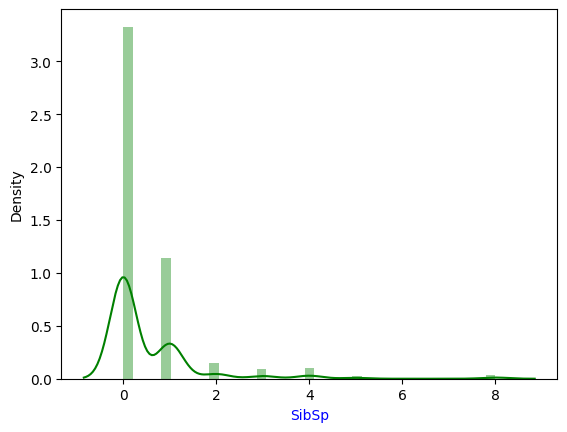

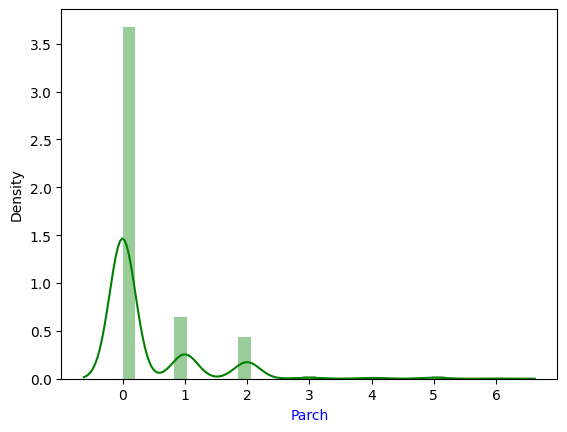

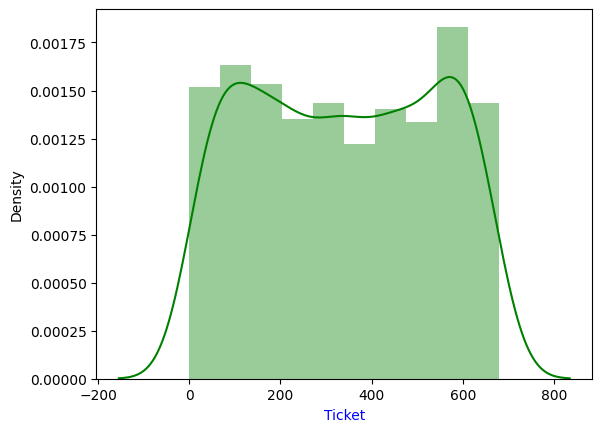

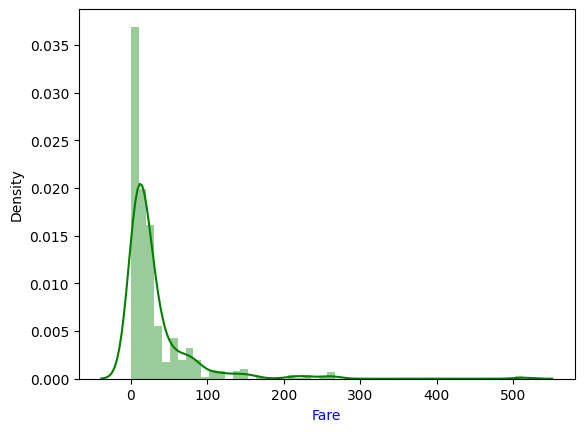

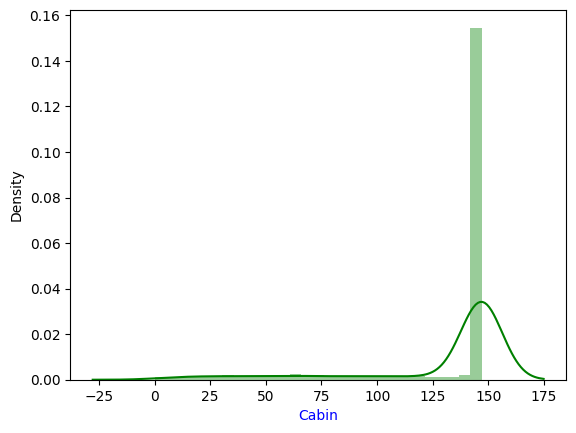

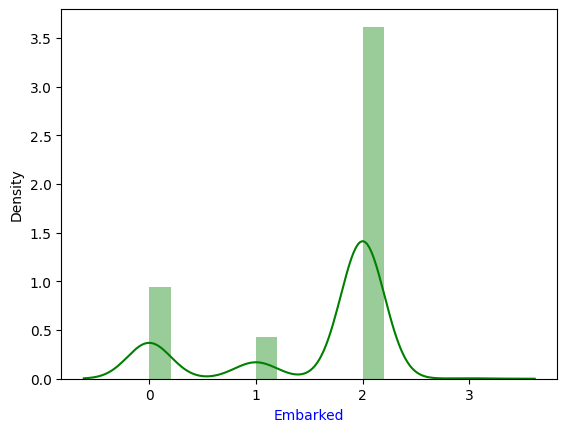

In [14]:
for d in df.columns:
  sns.distplot(df[d],color='green')
  plt.xlabel(d,color='blue')
  plt.ylabel('Density')
  plt.show()

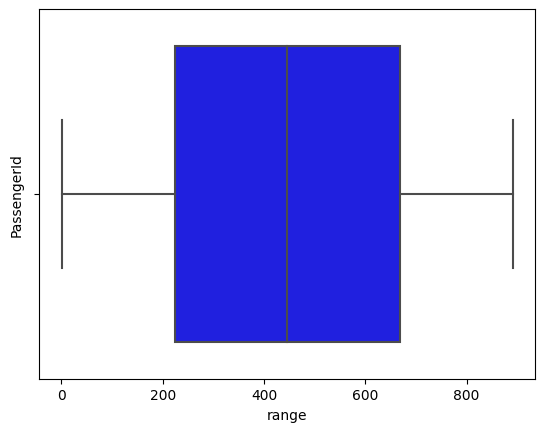

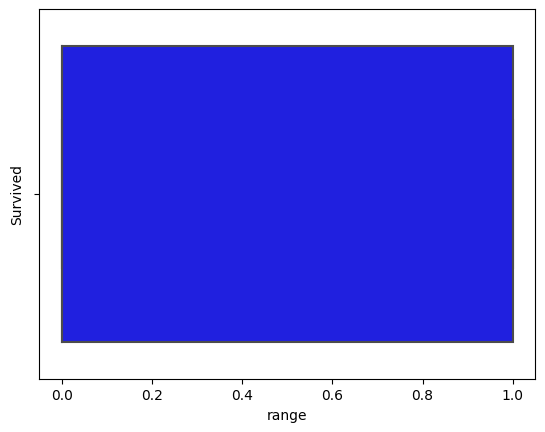

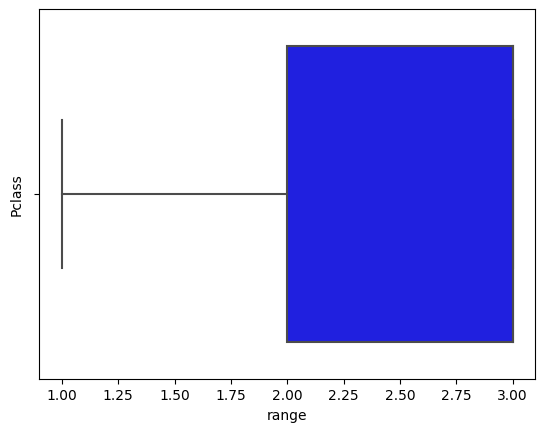

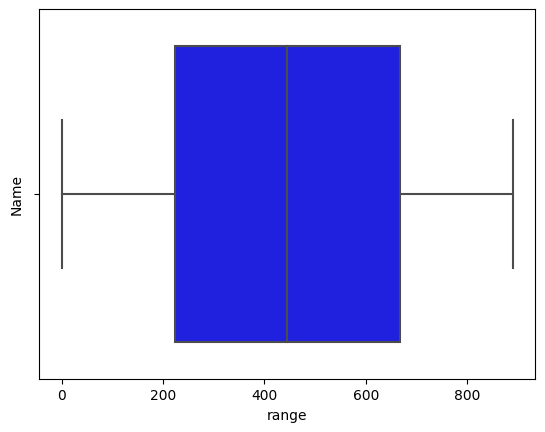

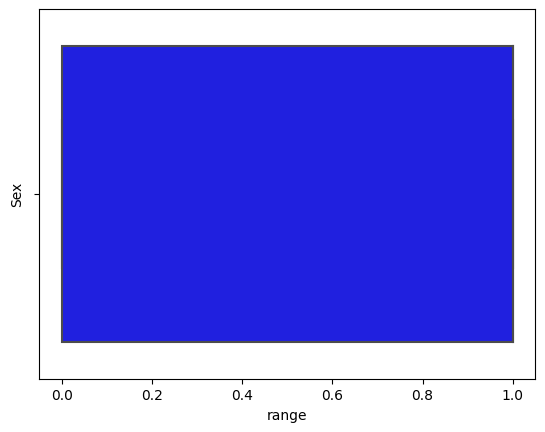

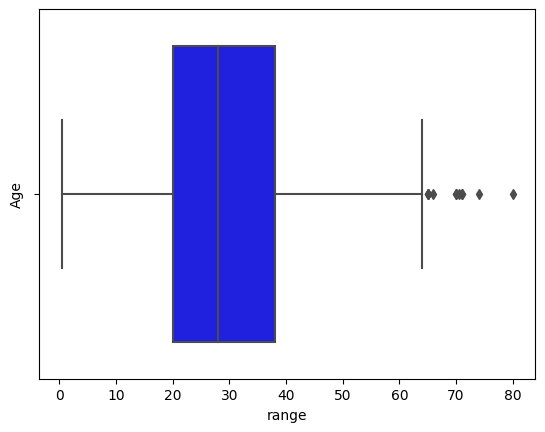

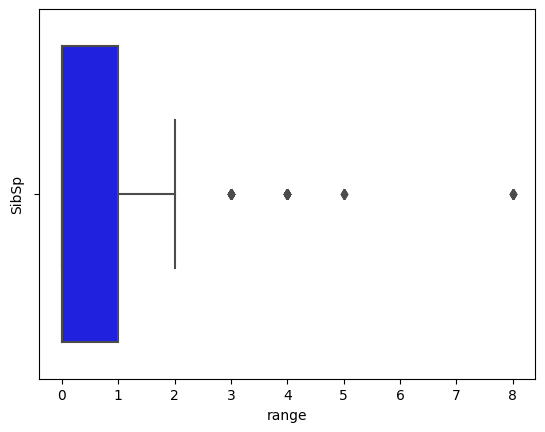

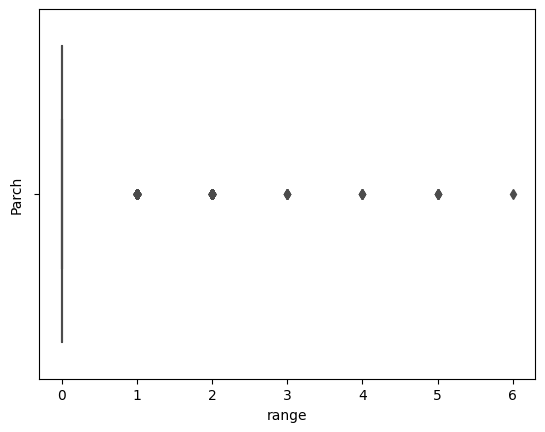

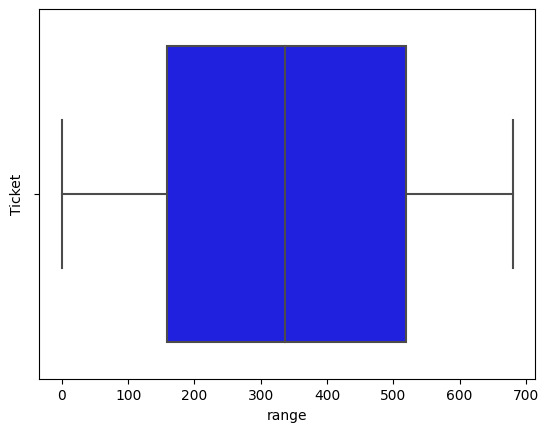

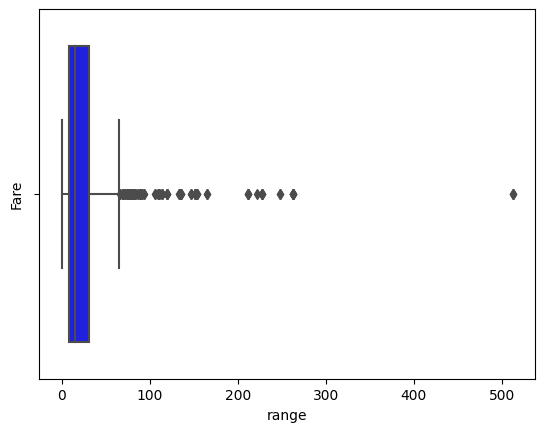

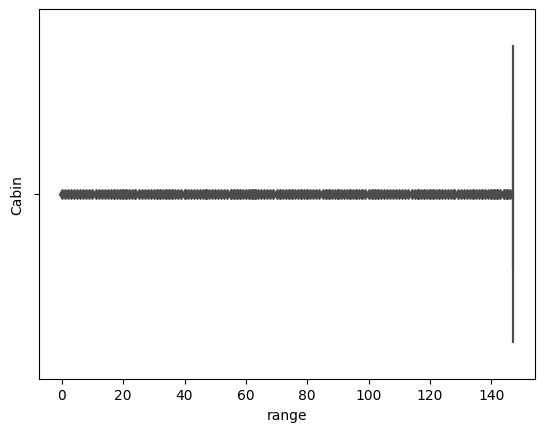

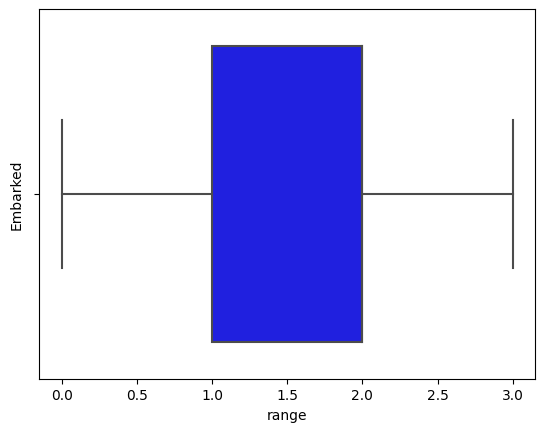

In [15]:
for o in df.columns:
  sns.boxplot(x=df[o],color='blue')
  plt.ylabel(o)
  plt.xlabel('range')
  plt.show()

In [16]:
df.drop(['Cabin','PassengerId'],axis=1,inplace=True)

In [17]:
df.drop(['Name'],axis=1,inplace=True)

In [18]:
df.dropna(axis=0,inplace=True)

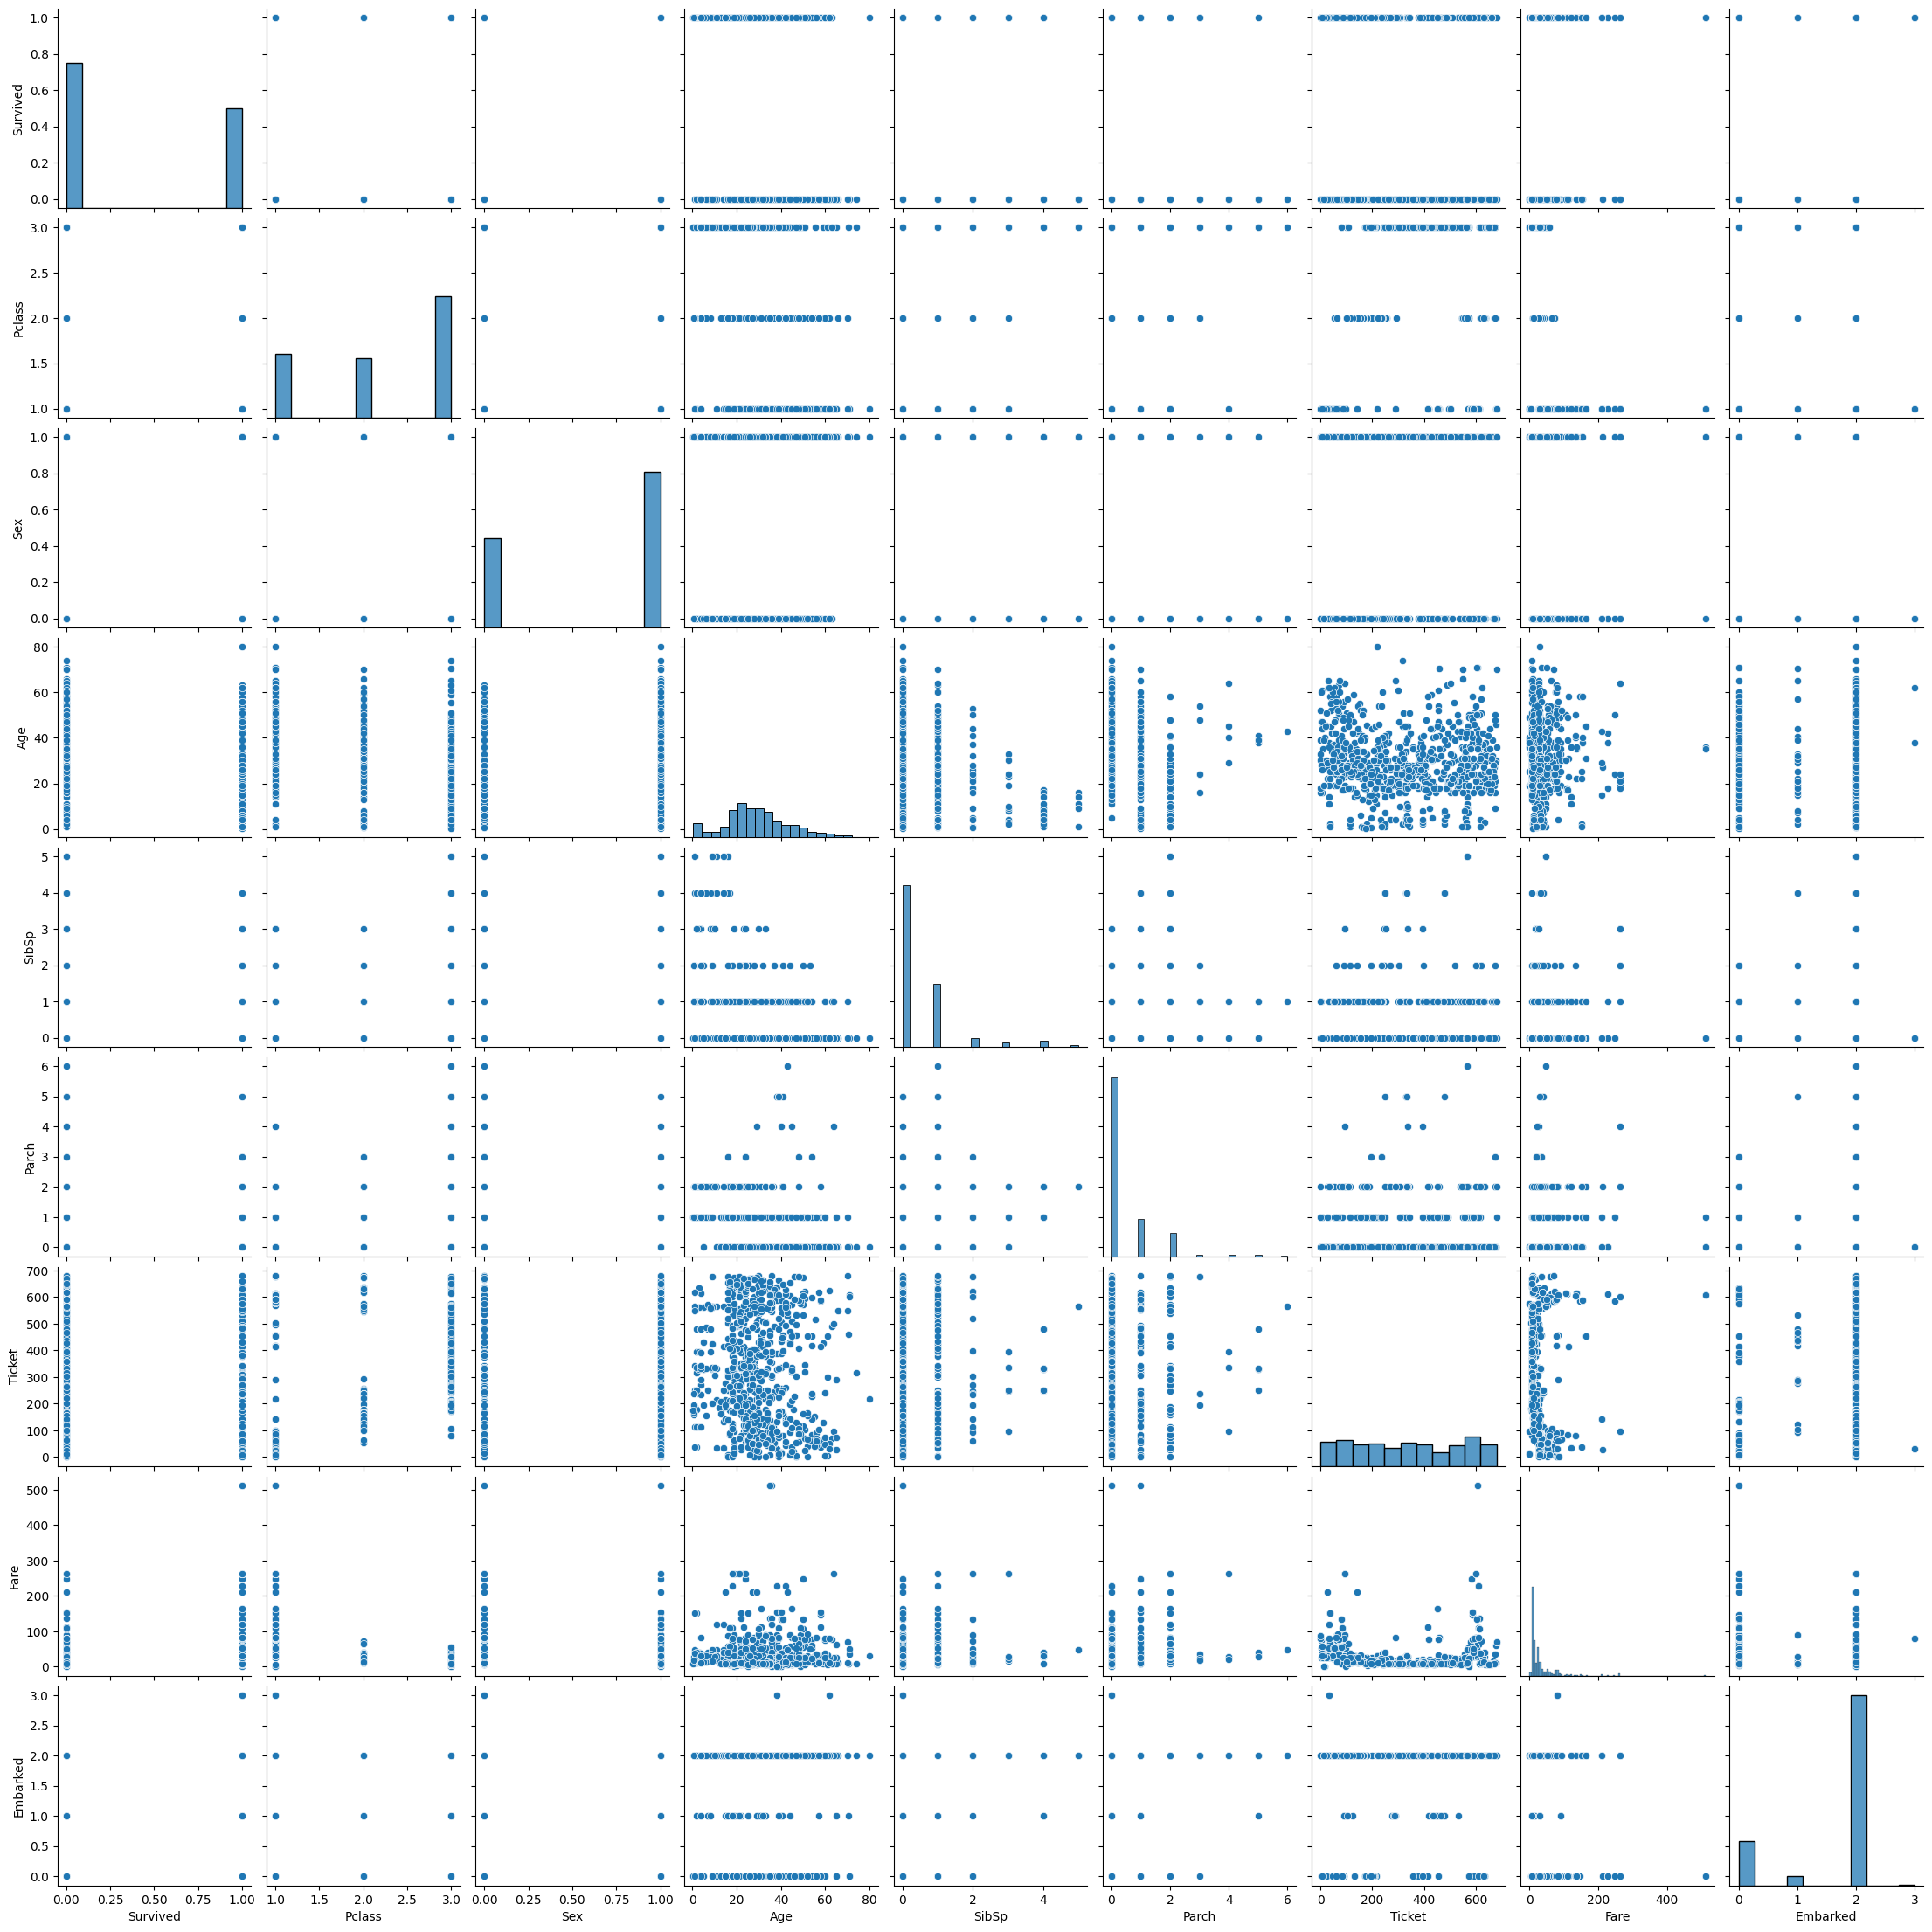

In [19]:
sns.pairplot(df)

## VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=df.drop(['Survived'],axis=1)
vif=pd.DataFrame({'Columns':v.columns})
vif['VIF']=[variance_inflation_factor(v.values,r)
            for r in range(len(v.columns))]
vif

,Columns,VIF
0,Pclass,8.564807
1,Sex,3.019690
2,Age,4.234980
3,SibSp,1.638717
4,Parch,1.617580
5,Ticket,4.343361
6,Fare,1.772573
7,Embarked,5.268040


## Correlation

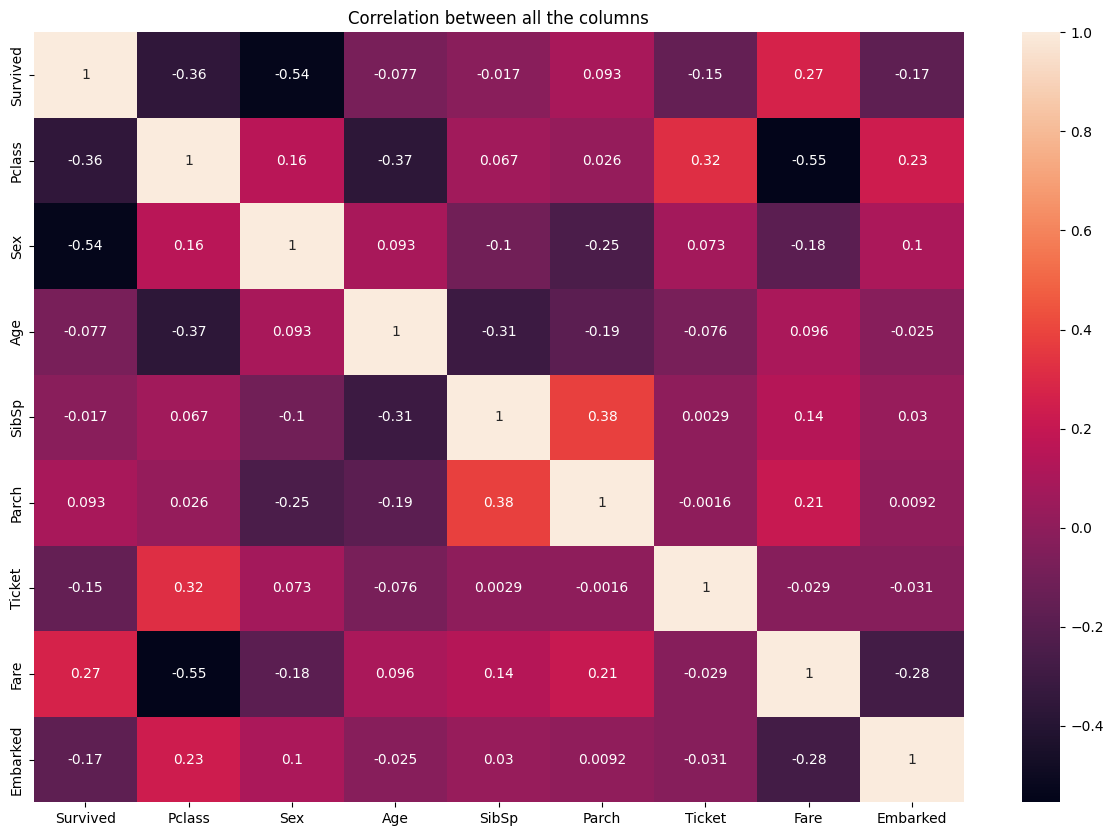

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between all the columns')
plt.show()

In [22]:
X=df.drop(['Survived'],axis=1)
Y=df['Survived']

In [23]:
!pip install imbalanced-learn

Before over sampling Counter({0: 424, 1: 290})
After over sampling Counter({0: 424, 1: 424})


<Axes: xlabel='Survived', ylabel='count'>

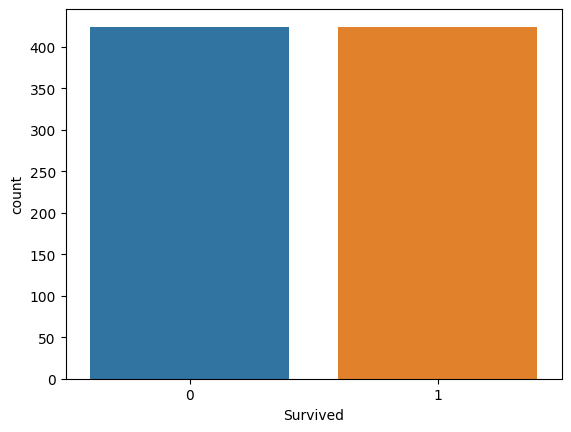

In [24]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_res,y_res=sm.fit_resample(X,Y)
print('Before over sampling {}'.format(Counter(Y)))
print('After over sampling {}'.format(Counter(y_res)))
sns.countplot(x=y_res)

In [25]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x1=std.fit_transform(x_res)

In [26]:
!pip install optimal-data-selector

In [27]:
from optimal_data_selector.optimal import OptimalDataSelector
x_train,x_test,y_train,y_test=OptimalDataSelector(predictor=x1,target=y_res,combination=5500,train_size=0.8,random_state=12,acc_forecast=False)

Computation time = 5.750254233678182  mints
Do you wanna save this combination ?[yes/no] : yes
Dont forget to write extension[.csv]
Enter file name : optimal_data2.csv
File  optimal_data2.csv  has been saved to your 'PWD'


In [28]:
x_train1,x_test1,y_train1,y_test1=OptimalDataSelector(load_path='/content/optimal_data2.csv')

Make sure that you are using the same train_size value that you had used at the time of saving the combination.
If you are giving wrong train_size value then your accuracy won't be good
enter train_size : 0.8


In [29]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((678, 8), (170, 8), (678,), (170,))

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train1,y_train1)
log.score(x_test1,y_test1)

0.9352941176470588

In [32]:
log.score(x_train1,y_train1)

0.7905604719764012

In [33]:
y_pre=log.predict(x_test1)

## Performing Metrics

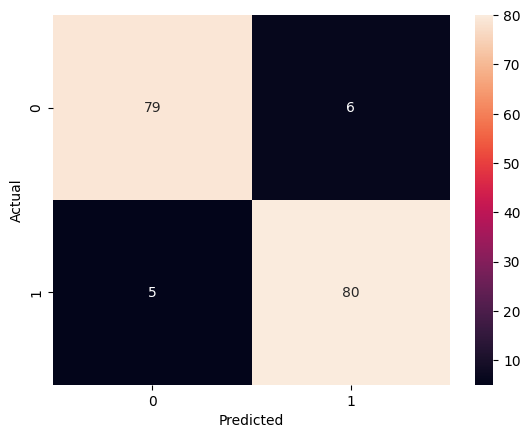

In [34]:
sns.heatmap(confusion_matrix(y_test1,y_pre),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
print(classification_report(y_test1,y_pre))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        85
           1       0.93      0.94      0.94        85

    accuracy                           0.94       170
   macro avg       0.94      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170



# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dis=DecisionTreeClassifier(random_state=80)
dis.fit(x_train1,y_train1)
dis.score(x_test1,y_test1)

0.8941176470588236

In [37]:
dis.score(x_train1,y_train1)

1.0

## Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
param={'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'max_depth':range(2,6,1),
           'min_samples_split':range(2,5,1),
           'min_samples_leaf':range(1,5,1),
           'ccp_alpha':np.random.rand(30)}
gcv=GridSearchCV(estimator=dis,param_grid=param,cv=10,n_jobs=1)
gcv.fit(x_train1,y_train1)
gcv.best_params_

In [38]:
dis1=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5,min_samples_leaf=3,
                            min_samples_split=2,ccp_alpha=0.018117968895281167,random_state=80)
dis1.fit(x_train1,y_train1)
dis1.score(x_test1,y_test1)

0.9058823529411765

In [39]:
dis1.score(x_train1,y_train1)

0.7728613569321534

In [40]:
y_pre_dis=dis1.predict(x_test1)

## Performing Metrics

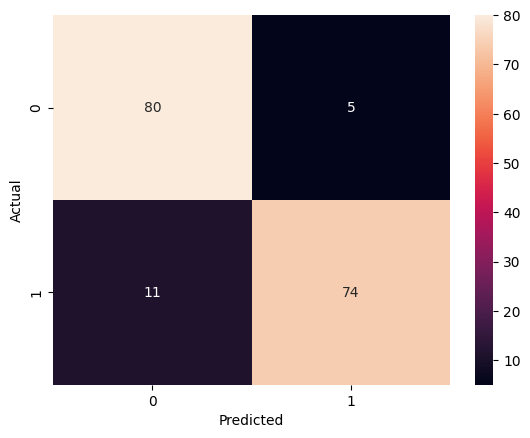

In [41]:
sns.heatmap(confusion_matrix(y_test1,y_pre_dis),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
print(classification_report(y_test1,y_pre_dis))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        85
           1       0.94      0.87      0.90        85

    accuracy                           0.91       170
   macro avg       0.91      0.91      0.91       170
weighted avg       0.91      0.91      0.91       170



# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
for i in range(30,135,5):
  ran1=RandomForestClassifier(n_estimators=i,random_state=80)
  ran1.fit(x_train1,y_train1)
  print('for ',i,' estimators accuracy is = '+str(ran1.score(x_test1,y_test1)))
  print()

for  30  estimators accuracy is = 0.9352941176470588

for  35  estimators accuracy is = 0.9470588235294117

for  40  estimators accuracy is = 0.9411764705882353

for  45  estimators accuracy is = 0.9470588235294117

for  50  estimators accuracy is = 0.9470588235294117

for  55  estimators accuracy is = 0.9529411764705882

for  60  estimators accuracy is = 0.9470588235294117

for  65  estimators accuracy is = 0.9529411764705882

for  70  estimators accuracy is = 0.9588235294117647

for  75  estimators accuracy is = 0.9588235294117647

for  80  estimators accuracy is = 0.9588235294117647

for  85  estimators accuracy is = 0.9647058823529412

for  90  estimators accuracy is = 0.9588235294117647

for  95  estimators accuracy is = 0.9588235294117647

for  100  estimators accuracy is = 0.9588235294117647

for  105  estimators accuracy is = 0.9588235294117647

for  110  estimators accuracy is = 0.9588235294117647

for  115  estimators accuracy is = 0.9588235294117647

for  120  estimators acc

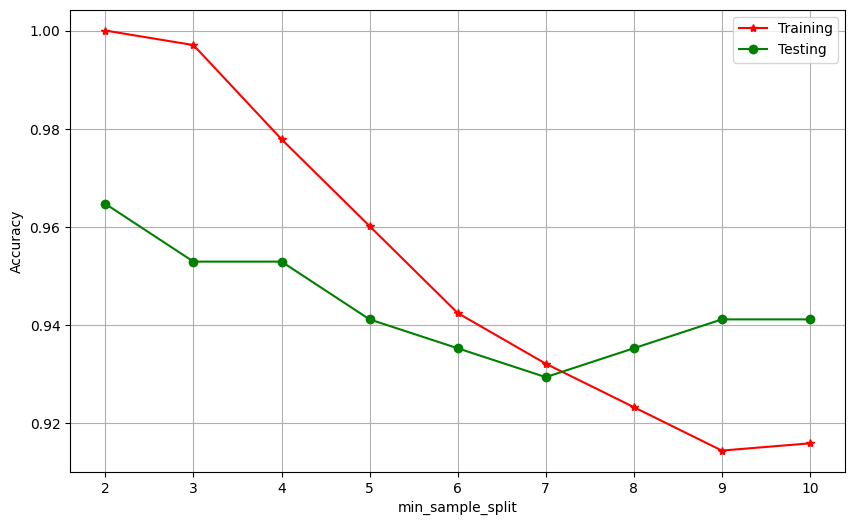

In [44]:
train=[]
test=[]
n_m=[]
for m in range(2,11):
  ran0=RandomForestClassifier(n_estimators=85,
                              random_state=80,min_samples_split=m)
  ran0.fit(x_train1,y_train1)
  n_m.append(m)
  train.append(ran0.score(x_train1,y_train1))
  test.append(ran0.score(x_test1,y_test1))
plt.figure(figsize=(10,6))
plt.plot(n_m,train,color='red',marker='*',label='Training')
plt.plot(n_m,test,color='green',marker='o',label='Testing')
plt.grid()
plt.legend()
plt.xlabel('min_sample_split')
plt.ylabel('Accuracy')
plt.show()


In [45]:
ran=RandomForestClassifier(n_estimators=85,random_state=80,min_samples_split=2)
ran.fit(x_train1,y_train1)
ran.score(x_test1,y_test1)

0.9647058823529412

In [46]:
ran.score(x_train1,y_train1)

1.0

In [47]:
y_pre_ran=ran.predict(x_test1)

## Performing Metrics

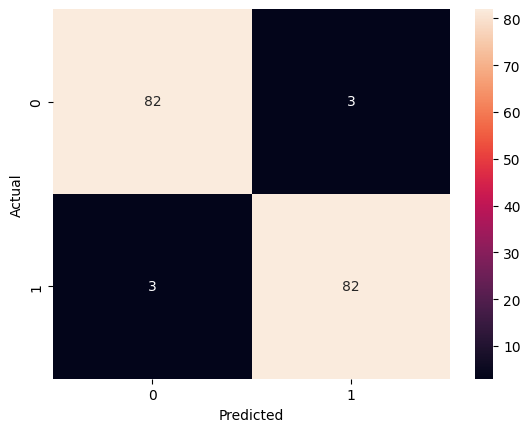

In [48]:
sns.heatmap(confusion_matrix(y_test1,y_pre_ran),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
print(classification_report(y_test1,y_pre_ran))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        85
           1       0.96      0.96      0.96        85

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



# SVM

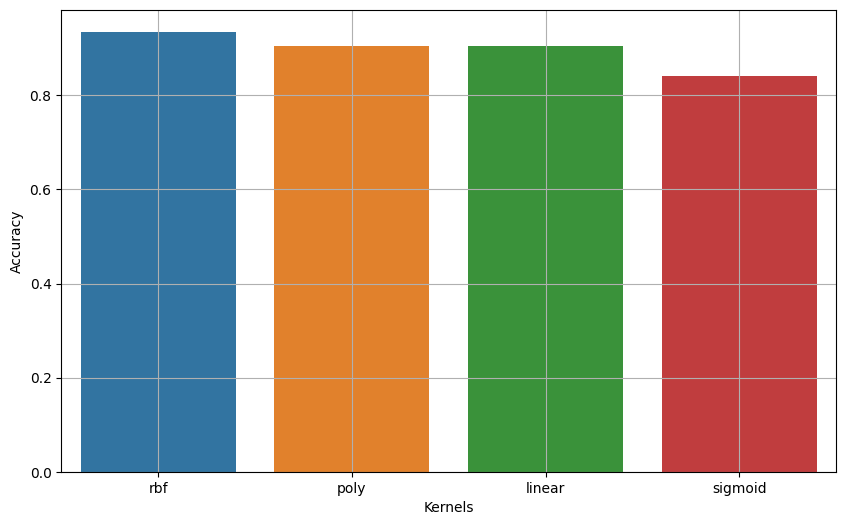

In [50]:
from sklearn.svm import SVC
kernal=['rbf','poly','linear','sigmoid']
acc=[]
for k in kernal:
  svm1=SVC(kernel=k)
  svm1.fit(x_train1,y_train1)
  acc.append(svm1.score(x_test1,y_test1))
plt.figure(figsize=(10,6))
sns.barplot(x=kernal,y=acc)
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [51]:
for i in np.linspace(0.1,1.5,10):
  svm2=SVC(kernel='rbf',gamma=i,random_state=0)
  svm2.fit(x_train1,y_train1)
  print('When gamma value is = ',i,' accuracy is = '+str(svm2.score(x_test1,y_test1)))
  print('Training accuracy is = '+str(svm2.score(x_train1,y_train1)))
  print()


When gamma value is =  0.1  accuracy is = 0.9352941176470588
Training accuracy is = 0.8289085545722714

When gamma value is =  0.25555555555555554  accuracy is = 0.9411764705882353
Training accuracy is = 0.8466076696165191

When gamma value is =  0.4111111111111111  accuracy is = 0.9470588235294117
Training accuracy is = 0.8628318584070797

When gamma value is =  0.5666666666666667  accuracy is = 0.9352941176470588
Training accuracy is = 0.8731563421828908

When gamma value is =  0.7222222222222222  accuracy is = 0.9117647058823529
Training accuracy is = 0.8761061946902655

When gamma value is =  0.8777777777777778  accuracy is = 0.8941176470588236
Training accuracy is = 0.8805309734513275

When gamma value is =  1.0333333333333334  accuracy is = 0.8764705882352941
Training accuracy is = 0.8849557522123894

When gamma value is =  1.188888888888889  accuracy is = 0.8705882352941177
Training accuracy is = 0.8864306784660767

When gamma value is =  1.3444444444444446  accuracy is = 0.8705

In [52]:
for i2 in range(1,8):
  svm3=SVC(kernel='poly',degree=i2)
  svm3.fit(x_train1,y_train1)
  print('Degree = ',i2,' accuracy is = '+str(svm3.score(x_test1,y_test1)))
  print('Training accuracy is = '+str(svm3.score(x_train1,y_train1)))
  print()

Degree =  1  accuracy is = 0.9058823529411765
Training accuracy is = 0.7728613569321534

Degree =  2  accuracy is = 0.7705882352941177
Training accuracy is = 0.7522123893805309

Degree =  3  accuracy is = 0.9058823529411765
Training accuracy is = 0.8421828908554573

Degree =  4  accuracy is = 0.7647058823529411
Training accuracy is = 0.7610619469026548

Degree =  5  accuracy is = 0.7470588235294118
Training accuracy is = 0.7625368731563422

Degree =  6  accuracy is = 0.7352941176470589
Training accuracy is = 0.7507374631268436

Degree =  7  accuracy is = 0.7352941176470589
Training accuracy is = 0.7536873156342183



In [53]:
final_svm=SVC(kernel='rbf',gamma=0.4111111111111111,random_state=0)
final_svm.fit(x_train1,y_train1)
final_svm.score(x_test1,y_test1)

0.9470588235294117

In [54]:
final_svm.score(x_train1,y_train1)

0.8628318584070797

In [55]:
y_pre_svm=final_svm.predict(x_test1)

## Performing Metrics

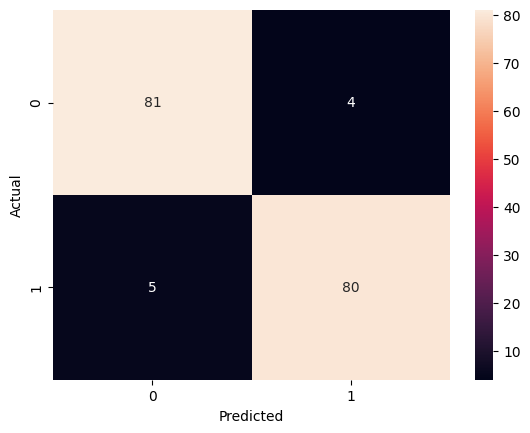

In [56]:
sns.heatmap(confusion_matrix(y_test1,y_pre_svm),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
print(classification_report(y_test1,y_pre_svm))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        85
           1       0.95      0.94      0.95        85

    accuracy                           0.95       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



# KNN

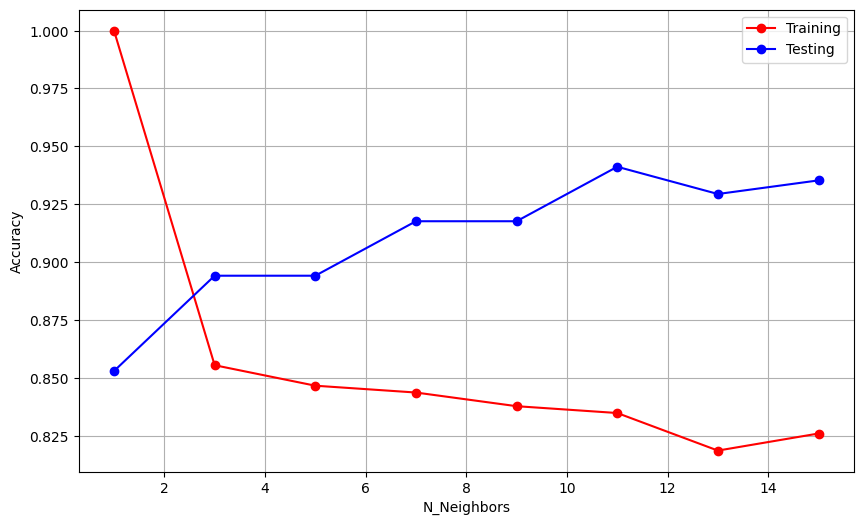

In [58]:
from sklearn.neighbors import KNeighborsClassifier
tr1=[]
ts1=[]
n_n=[]
for n in range(1,16,2):
  knn1=KNeighborsClassifier(n_neighbors=n)
  knn1.fit(x_train1,y_train1)
  n_n.append(n)
  tr1.append(knn1.score(x_train1,y_train1))
  ts1.append(knn1.score(x_test1,y_test1))
plt.figure(figsize=(10,6))
plt.plot(n_n,tr1,color='red',label='Training',marker='o')
plt.plot(n_n,ts1,color='blue',label='Testing',marker='o')
plt.xlabel('N_Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [59]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train1,y_train1)
knn.score(x_test1,y_test1)

0.9411764705882353

In [60]:
knn.score(x_train1,y_train1)

0.8348082595870207

In [61]:
y_pre_knn=knn.predict(x_test1)

## Performing Metrics

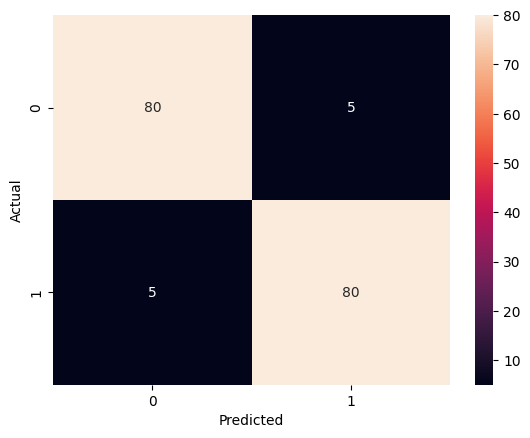

In [62]:
sns.heatmap(confusion_matrix(y_test1,y_pre_knn),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
print(classification_report(y_test1,y_pre_knn))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        85
           1       0.94      0.94      0.94        85

    accuracy                           0.94       170
   macro avg       0.94      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170



# Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train1,y_train1)
nb.score(x_test1,y_test1)

0.8941176470588236

In [65]:
nb.score(x_train1,y_train1)

0.7876106194690266

In [66]:
y_pre_nb=nb.predict(x_test1)

## Performing Metrics

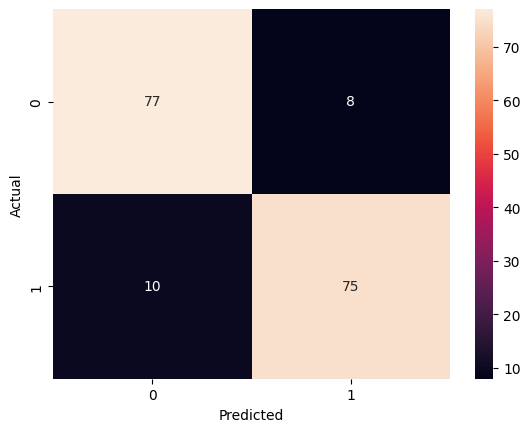

In [67]:
sns.heatmap(confusion_matrix(y_test1,y_pre_nb),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
print(classification_report(y_test1,y_pre_nb))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        85
           1       0.90      0.88      0.89        85

    accuracy                           0.89       170
   macro avg       0.89      0.89      0.89       170
weighted avg       0.89      0.89      0.89       170



# Ensemble Learning


# Voting

In [69]:
from sklearn.ensemble import VotingClassifier
est1=[('ran',ran),('rbf',final_svm),('log',log)]
est2=[('ran',ran),('rbf',final_svm)]
est3=[('ran',ran),('rbf',final_svm),('log',log),('knn',knn)]
est0=[est1,est2,est3]
for e in est0:
  vot1=VotingClassifier(estimators=e)
  vot1.fit(x_train1,y_train1)
  print('for estimetors ',e,' accuracy is = '+str(vot1.score(x_test1,y_test1)))
  print()

for estimetors  [('ran', RandomForestClassifier(n_estimators=85, random_state=80)), ('rbf', SVC(gamma=0.4111111111111111, random_state=0)), ('log', LogisticRegression())]  accuracy is = 0.9588235294117647

for estimetors  [('ran', RandomForestClassifier(n_estimators=85, random_state=80)), ('rbf', SVC(gamma=0.4111111111111111, random_state=0))]  accuracy is = 0.9588235294117647

for estimetors  [('ran', RandomForestClassifier(n_estimators=85, random_state=80)), ('rbf', SVC(gamma=0.4111111111111111, random_state=0)), ('log', LogisticRegression()), ('knn', KNeighborsClassifier(n_neighbors=11))]  accuracy is = 0.9588235294117647



In [70]:
vot=VotingClassifier(estimators=est3)
vot.fit(x_train1,y_train1)
vot.score(x_test1,y_test1)

0.9588235294117647

In [71]:
vot.score(x_train1,y_train1)

0.8613569321533924

In [72]:
y_pre_vot=vot.predict(x_test1)

## Performing Metrics

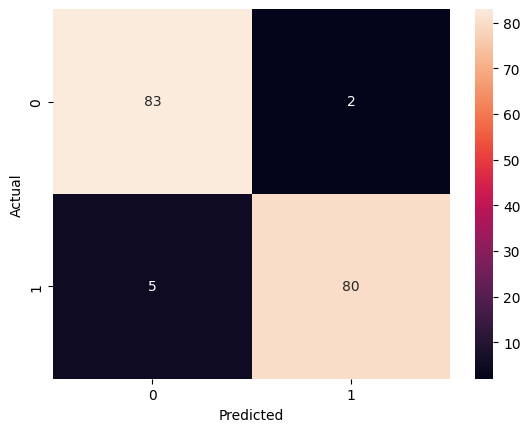

In [73]:
sns.heatmap(confusion_matrix(y_test1,y_pre_vot),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
print(classification_report(y_test1,y_pre_vot))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        85
           1       0.98      0.94      0.96        85

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



# Bagging

In [75]:
from sklearn.ensemble import BaggingClassifier
parameters=[]
acc2=[]
sample=[0.6,0.7,0.8,0.9,1.0]
for n1 in range(10,70,10):
  for s in sample:
    for f in sample:
      bag1=BaggingClassifier(estimator=ran,n_estimators=n1,max_samples=s,max_features=f,random_state=80)
      bag1.fit(x_train1,y_train1)
      parameters.append(['n_estimators= ',n1,'max_sample = ',s,'max_feature = ',f])
      acc2.append(bag1.score(x_test1,y_test1))
print('best parameters are {} '.format(parameters[acc2.index(max(acc2))]))
print('Accuracy is {}'.format(max(acc2)))


best parameters are ['n_estimators= ', 50, 'max_sample = ', 1.0, 'max_feature = ', 1.0] 
Accuracy is 0.9588235294117647


In [76]:
bag=BaggingClassifier(estimator=ran,n_estimators=50,max_samples=1.0,max_features=1.0,random_state=80)
bag.fit(x_train1,y_train1)
bag.score(x_test1,y_test1)

0.9588235294117647

In [77]:
bag.score(x_train1,y_train1)

0.8982300884955752

In [78]:
y_pre_bag=bag.predict(x_test1)

## Performoning Metrics

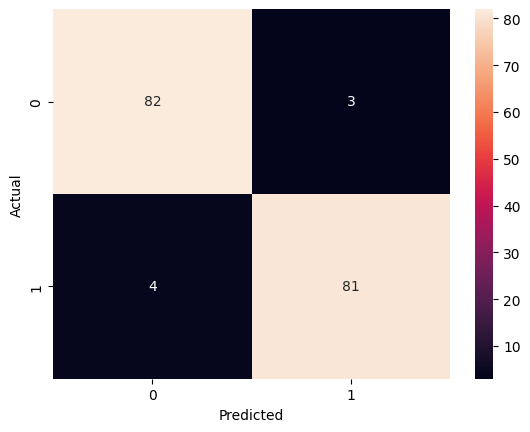

In [79]:
sns.heatmap(confusion_matrix(y_test1,y_pre_bag),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
print(classification_report(y_test1,y_pre_bag))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        85
           1       0.96      0.95      0.96        85

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



# Boosting

In [81]:
!pip install xgboost

In [82]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
ada=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier()
boost1=[ada,gr,xg]
for b in boost1:
  b.fit(x_train1,y_train1)
  print('in ',b,' accuracy is '+str(b.score(x_test1,y_test1)))
  print('training accuracy is {}'.format(b.score(x_train1,y_train1)))
  print()

in  AdaBoostClassifier()  accuracy is 0.9058823529411765
training accuracy is 0.8480825958702065

in  GradientBoostingClassifier()  accuracy is 0.9411764705882353
training accuracy is 0.9144542772861357

in  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)  accuracy is 0.9235294117647059
training

In [83]:
grd=GradientBoostingClassifier()
grd.fit(x_train1,y_train1)
grd.score(x_test1,y_test1)

0.9411764705882353

In [84]:
grd.score(x_train1,y_train1)

0.9144542772861357

In [85]:
y_pre_grd=grd.predict(x_test1)

## Performing Metrics

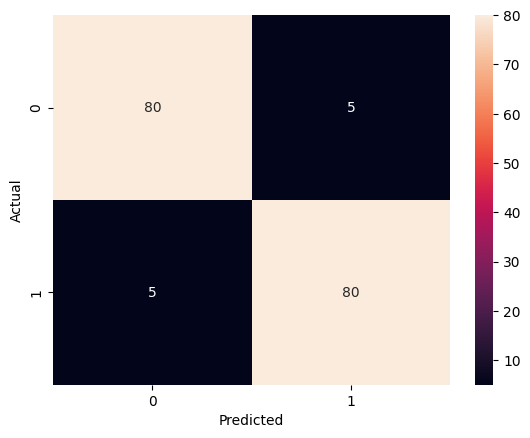

In [86]:
sns.heatmap(confusion_matrix(y_test1,y_pre_grd),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
print(classification_report(y_test1,y_pre_grd))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        85
           1       0.94      0.94      0.94        85

    accuracy                           0.94       170
   macro avg       0.94      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170



## ROC Curve

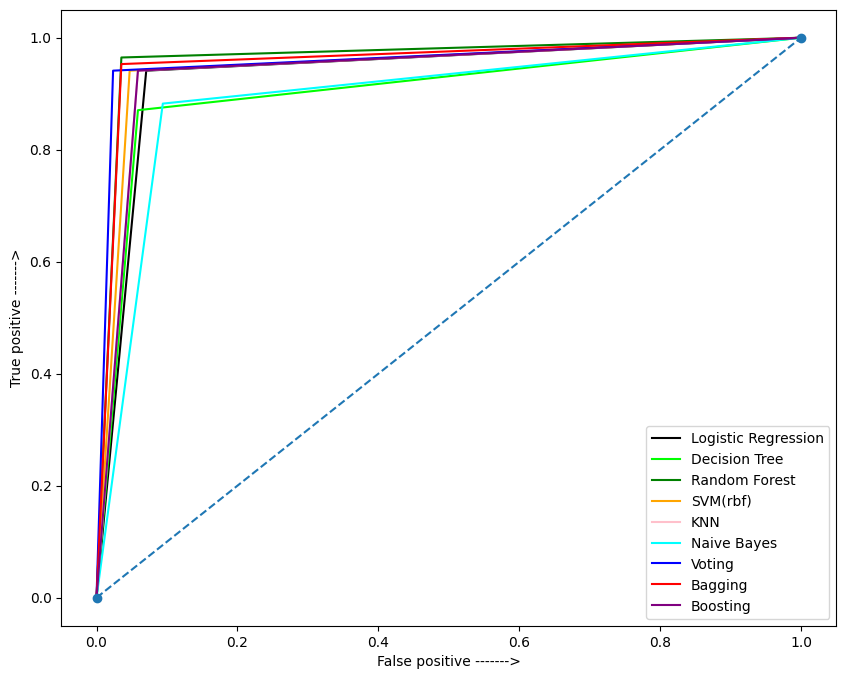

In [88]:
plt.figure(figsize=(10,8))
x_log,y_log,c_log=roc_curve(y_test1,y_pre)
x_dis,y_dis,c_dis=roc_curve(y_test1,y_pre_dis)
x_ran,y_ran,c_ran=roc_curve(y_test1,y_pre_ran)
x_svm,y_svm,c_svm=roc_curve(y_test1,y_pre_svm)
x_knn,y_knn,c_knn=roc_curve(y_test1,y_pre_knn)
x_nb,y_nb,c_nb=roc_curve(y_test1,y_pre_nb)
x_vot,y_vot,c_vot=roc_curve(y_test1,y_pre_vot)
x_bag,y_bag,c_bag=roc_curve(y_test1,y_pre_bag)
x_boo,y_boo,c_boo=roc_curve(y_test1,y_pre_grd)
plt.plot(x_log,y_log,color='black',label='Logistic Regression')
plt.plot(x_dis,y_dis,color='lime',label='Decision Tree')
plt.plot(x_ran,y_ran,color='green',label='Random Forest')
plt.plot(x_svm,y_svm,color='orange',label='SVM(rbf)')
plt.plot(x_knn,y_knn,color='pink',label='KNN')
plt.plot(x_nb,y_nb,color='cyan',label='Naive Bayes')
plt.plot(x_vot,y_vot,color='blue',label='Voting')
plt.plot(x_bag,y_bag,color='red',label='Bagging')
plt.plot(x_boo,y_boo,color='purple',label='Boosting')
plt.plot([0,1],linestyle='--',marker='o')
plt.xlabel('False positive ------->')
plt.ylabel('True positive ------->')
plt.legend()
plt.show()

## Accuracy Comparison

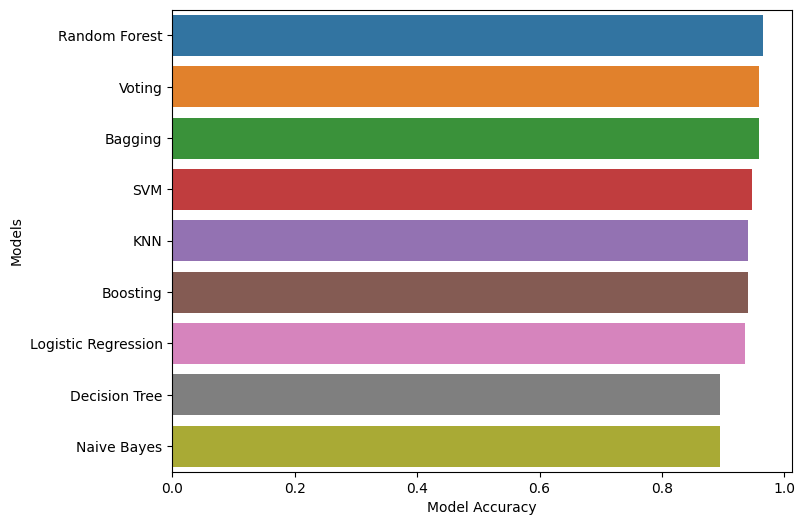

In [89]:
acc_df=pd.DataFrame({'model':['Logistic Regression','Decision Tree','Random Forest','SVM','KNN','Naive Bayes','Voting',
                              'Bagging','Boosting'],'accuracy':[log.score(x_test1,y_test1),dis.score(x_test1,y_test1),
                                ran.score(x_test1,y_test1),final_svm.score(x_test1,y_test1),knn.score(x_test1,y_test1),
                                nb.score(x_test1,y_test1),vot.score(x_test1,y_test1),bag.score(x_test1,y_test1),
                                grd.score(x_test1,y_test1)]})
as_df=acc_df.sort_values('accuracy',ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=as_df['accuracy'],y=as_df['model'])
plt.xlabel('Model Accuracy')
plt.ylabel('Models')
plt.show()

In [ ]:
"""                                               Thank you                   """